In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import rarfile
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [3]:
# load the dataset
df = pd.read_csv("dataset.csv")

In [14]:
# Get a quick overview of the data
df.head(2)

,restaurant_link,restaurant_name,original_location,country,region,province,city,address,latitude,longitude,...,excellent,very_good,average,poor,terrible,food,service,value,atmosphere,keywords
0,g10001637-d10002227,Le 147,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Ha...",France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,"10 Maison Neuve, 87510 Saint-Jouvent France",45.961674,1.169131,...,2.0,0.0,0.0,0.0,0.0,4.0,4.5,4.0,NaN,NaN
1,g10001637-d14975787,Le Saint Jouvent,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Ha...",France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,"16 Place de l Eglise, 87510 Saint-Jouvent France",45.957040,1.205480,...,2.0,2.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


## Columns Description
#### restaurant_link: Unique identifier for the restaurant.
#### restaurant_name: The name of the restaurant.
#### original_location: The original location of the restaurant.
#### country: The country where the restaurant is located.
#### region: The region where the restaurant is located.
#### province: The province where the restaurant is located.
#### city: The city where the restaurant is located.
#### address: The physical address of the restaurant.
#### latitude: The latitude of the restaurant's location.
#### longitude: The longitude of the restaurant's location.
#### claimed: Whether the restaurant has been claimed or not.
#### awards: Any awards the restaurant has received.
#### popularity_detailed: The restaurant's popularity in detailed form.
#### popularity_generic: The restaurant's popularity in generic form.
#### top_tags: Popular tags associated with the restaurant.
#### price_level: The price level of the restaurant.
#### price_range: The price range of the restaurant.
#### meals: The meals offered by the restaurant.
#### cuisines: The cuisines offered by the restaurant.
#### special_diets: Special diets catered for by the restaurant.
#### features: Additional features of the restaurant.
#### vegetarian_friendly: Whether the restaurant is vegetarian-friendly or not.
#### vegan_options: Whether the restaurant has vegan options or not.
#### gluten_free: Whether the restaurant is gluten-free or not.
#### original_open_hours: The original opening hours of the restaurant.
#### open_days_per_week: The number of days per week that the restaurant is open.
#### open_hours_per_week: The number of hours per week that the restaurant is open.
#### working_shifts_per_week: The number of working shifts per week at the restaurant.
#### avg_rating: The average rating of the restaurant.
#### total_reviews_count: The total number of reviews for the restaurant.
#### default_language: The default language of the reviews.
#### reviews_count_in_default_language: The number of reviews in the default language.
#### excellent: The number of "excellent" ratings for the restaurant.
#### very_good: The number of "very good" ratings for the restaurant.
#### average: The number of "average" ratings for the restaurant.
#### poor: The number of "poor" ratings for the restaurant.
#### terrible: The number of "terrible" ratings for the restaurant.
#### food: The rating for food at the restaurant.
#### service: The rating for service at the restaurant.
#### value: The rating for value
#### atmosphere: The rating for atmosphere
#### keywords: Keywords that describe the menu of related restaurant

In [5]:
df.shape

(1083397, 42)

In [13]:
df.duplicated().sum()

0

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083397 entries, 0 to 1083396
Data columns (total 42 columns):
 #   Column                             Non-Null Count    Dtype  
---  ------                             --------------    -----  
 0   restaurant_link                    1083397 non-null  object 
 1   restaurant_name                    1083397 non-null  object 
 2   original_location                  1083397 non-null  object 
 3   country                            1083397 non-null  object 
 4   region                             1033074 non-null  object 
 5   province                           742765 non-null   object 
 6   city                               682712 non-null   object 
 7   address                            1083397 non-null  object 
 8   latitude                           1067607 non-null  float64
 9   longitude                          1067607 non-null  float64
 10  claimed                            1081555 non-null  object 
 11  awards                  

In [7]:
# Check for missing data
print(df.isnull().sum())

restaurant_link                           0
restaurant_name                           0
original_location                         0
country                                   0
region                                50323
province                             340632
city                                 400685
address                                   0
latitude                              15790
longitude                             15790
claimed                                1842
awards                               820264
popularity_detailed                   94988
popularity_generic                    97792
top_tags                             110634
price_level                          277205
price_range                          779070
meals                                448050
cuisines                             169103
special_diets                        743141
features                             765990
vegetarian_friendly                       0
vegan_options                   

In [8]:
# Check the distribution of numerical columns
df.describe()

,latitude,longitude,open_days_per_week,open_hours_per_week,working_shifts_per_week,avg_rating,total_reviews_count,reviews_count_in_default_language,excellent,very_good,average,poor,terrible,food,service,value,atmosphere
count,1.067607e+06,1.067607e+06,593832.000000,593832.000000,593832.000000,986761.000000,1.031162e+06,988204.000000,988204.000000,988204.000000,988204.000000,988204.000000,988204.000000,599325.000000,604287.000000,602692.000000,261785.000000
mean,4.656718e+01,5.838040e+00,6.327081,62.023282,7.630754,4.035943,1.028890e+02,44.563415,24.653440,10.490516,4.109302,2.355306,2.954850,4.104179,4.067245,3.982897,3.933682
std,5.882611e+00,8.639410e+00,0.966734,30.538134,2.550128,0.713694,2.672415e+02,148.728179,89.850801,35.512256,15.669631,9.352756,11.030069,0.564208,0.581267,0.577605,0.555262
min,2.764031e+01,-7.121809e+01,1.000000,0.000000,1.000000,1.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,4.190986e+01,-8.027315e-01,6.000000,39.000000,6.000000,3.500000,6.000000e+00,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,4.000000,3.500000,3.500000
50%,4.658510e+01,5.646530e+00,7.000000,58.500000,7.000000,4.000000,2.400000e+01,7.000000,3.000000,2.000000,1.000000,0.000000,0.000000,4.000000,4.000000,4.000000,4.000000
75%,5.140537e+01,1.223767e+01,7.000000,81.500000,7.000000,4.500000,9.300000e+01,26.000000,13.000000,6.000000,2.000000,1.000000,2.000000,4.500000,4.500000,4.500000,4.500000
max,6.994156e+01,3.336942e+01,7.000000,168.000000,15.000000,5.000000,5.240400e+04,15229.000000,9383.000000,4091.000000,2132.000000,1253.000000,1215.000000,5.000000,5.000000,5.000000,5.000000


In [9]:
df.columns

Index(['restaurant_link', 'restaurant_name', 'original_location', 'country',
       'region', 'province', 'city', 'address', 'latitude', 'longitude',
       'claimed', 'awards', 'popularity_detailed', 'popularity_generic',
       'top_tags', 'price_level', 'price_range', 'meals', 'cuisines',
       'special_diets', 'features', 'vegetarian_friendly', 'vegan_options',
       'gluten_free', 'original_open_hours', 'open_days_per_week',
       'open_hours_per_week', 'working_shifts_per_week', 'avg_rating',
       'total_reviews_count', 'default_language',
       'reviews_count_in_default_language', 'excellent', 'very_good',
       'average', 'poor', 'terrible', 'food', 'service', 'value', 'atmosphere',
       'keywords'],
      dtype='object')

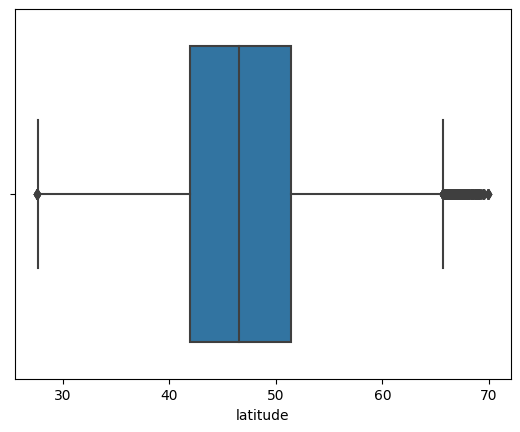

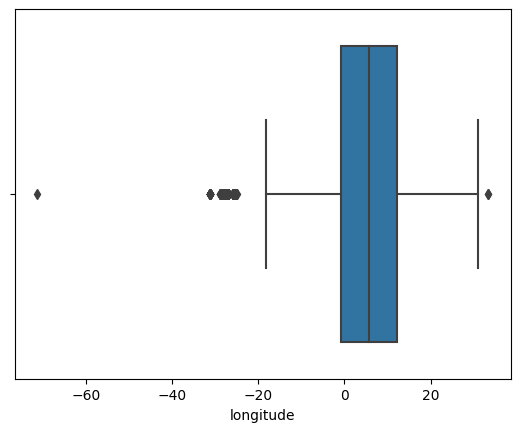

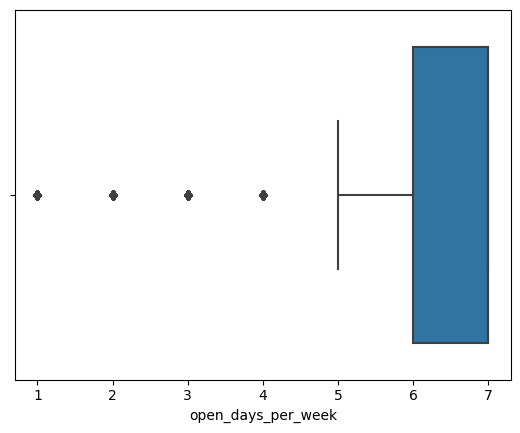

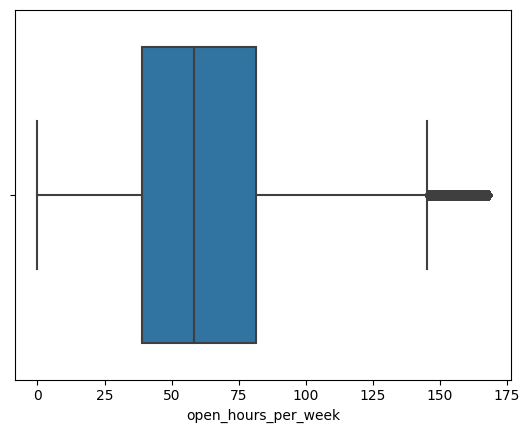

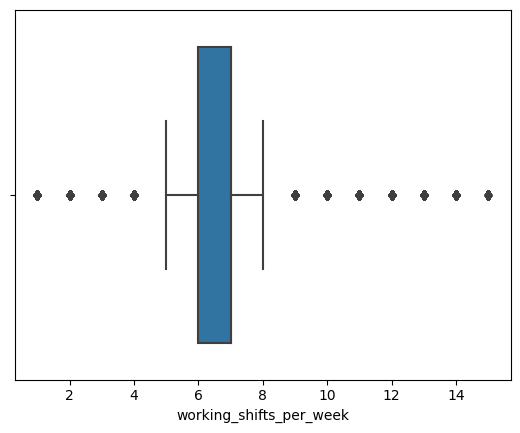

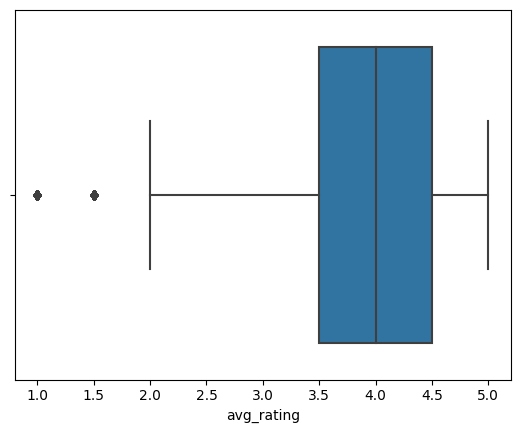

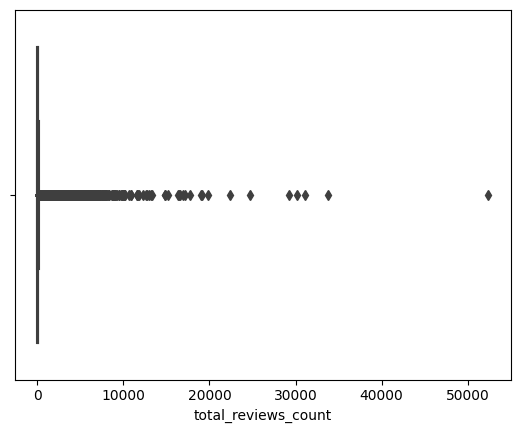

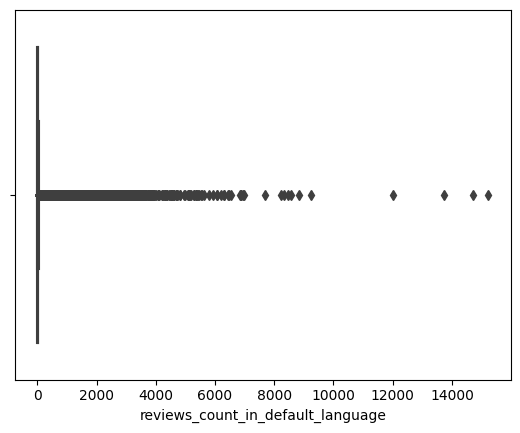

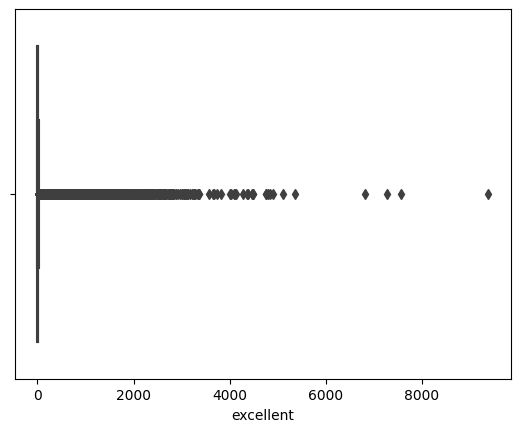

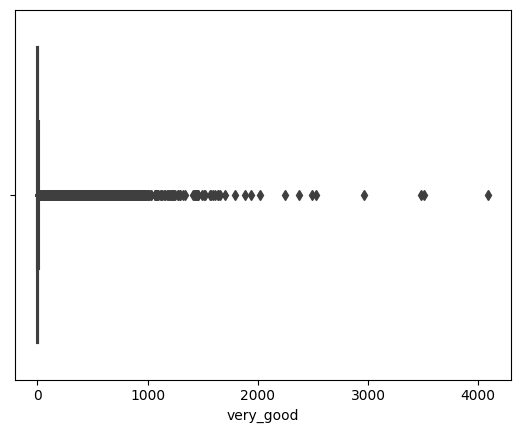

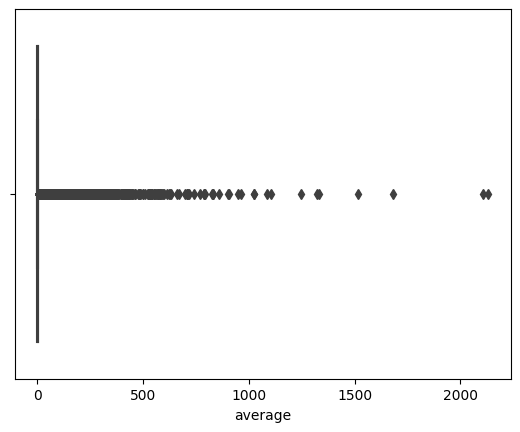

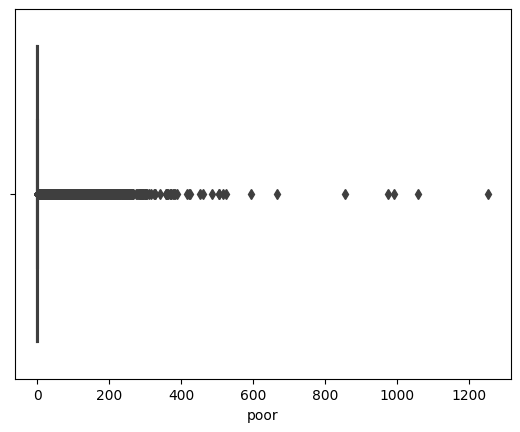

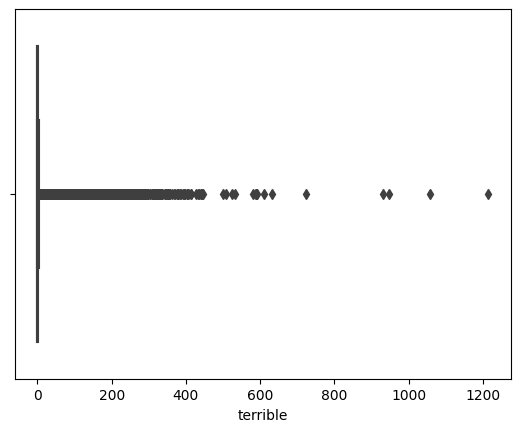

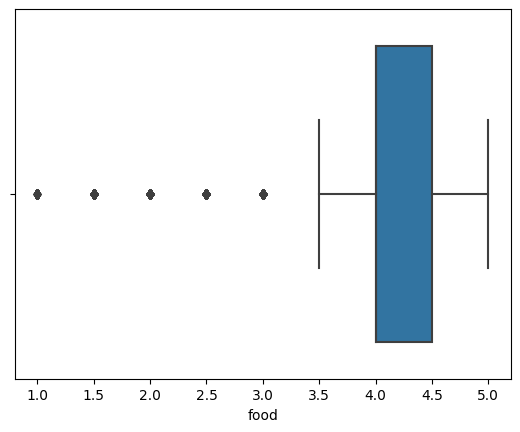

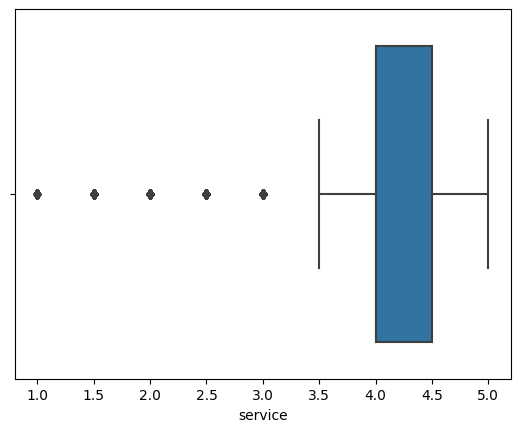

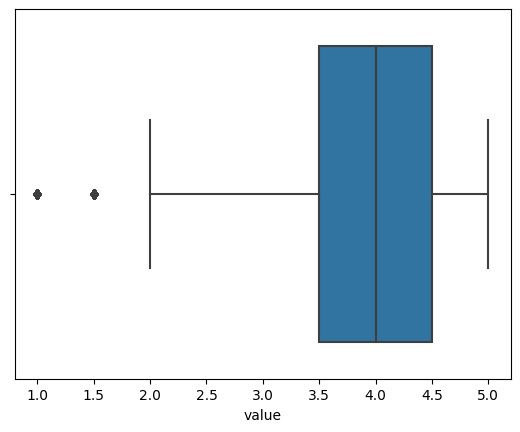

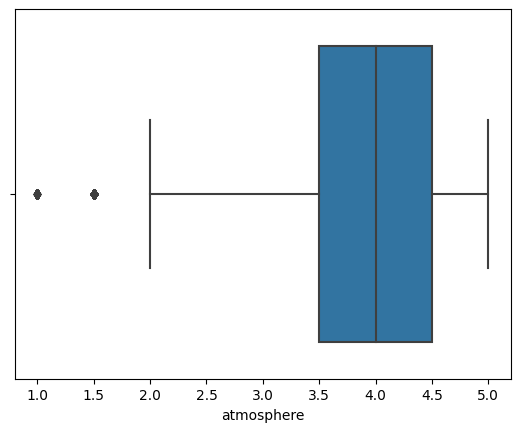

In [10]:
# Check for outliers
for col in df.columns:
    if df[col].dtype != 'object':
        sns.boxplot(x=df[col])
        plt.show()